## PREPROCESSING

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train=pd.read_csv("train2.csv").drop(["Unnamed: 0"],axis=1)
train["SalePrices"]=train["SalePrice"]
train=train.drop(["SalePrice"],axis=1)
test=pd.read_csv("test2.csv").drop(["Unnamed: 0"],axis=1)
train.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,Total_Home_Quality,TotalSF,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace,SalePrices
0,0,0,1,0,1,0,0,0,1,0,...,12,2566,3.5,4.127134,0.0,1,1,1,0,12.247699
1,0,0,1,0,1,0,0,0,1,0,...,14,2524,2.5,5.700444,0.0,0,1,1,1,12.109016
2,0,0,1,0,1,0,0,0,0,0,...,12,2706,3.5,3.761200,0.0,1,1,1,1,12.317171
3,0,0,1,0,1,0,0,0,0,0,...,12,2473,2.0,5.730100,0.0,1,1,1,1,11.849405
4,0,0,1,0,1,0,0,0,0,0,...,13,3343,3.5,5.624018,0.0,1,1,1,1,12.429220


## MACHINE LEARNING : LASSO

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso, SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


y=train.iloc[:,-1]
X=train.iloc[:,:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [3]:
np.random.seed(5)
Model = Ridge(15)
Model = Model.fit(X_train, y_train)

ypred_train=Model.predict(X_train).reshape(-1,1)
ypred_test=Model.predict(X_test).reshape(-1,1)
r2_score_train=r2_score(y_train.values.reshape(-1,1), ypred_train)
r2_score_test=r2_score(y_test.values.reshape(-1,1), ypred_test)

print("R2_score_train ",round(r2_score_train,3))
print("R2_score_test ",round(r2_score_test,3))
print("MAE_train ",round(mean_absolute_error(np.expm1(y_train.values.reshape(-1,1)), np.expm1(ypred_train))))
print("MAE_test ",round(mean_absolute_error(np.expm1(y_test.values.reshape(-1,1)), np.expm1(ypred_test))),"\n")

R2_score_train  0.938
R2_score_test  0.92
MAE_train  11885.0
MAE_test  13958.0 



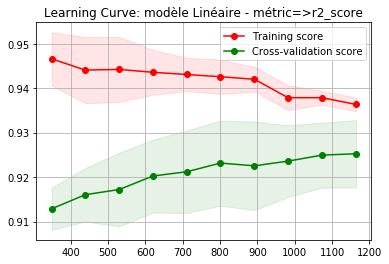

In [4]:
from sklearn.model_selection import learning_curve, ShuffleSplit
cv= ShuffleSplit(n_splits=3, test_size=0.2, random_state=4)
Model = Ridge(15)
train_sizes, train_scores, test_scores=learning_curve(Model, X, y,cv=cv, train_sizes=np.linspace(.3, 1.0, 10), scoring="r2")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()
plt.title("Learning Curve: modèle Linéaire - métric=>r2_score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")


Le modèle Lasso prédit le prix de vente des maisons avec une erreure confortable comprise entre +/- 18K€

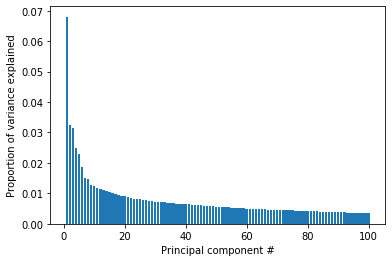

In [5]:
#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X=train.iloc[:,:-1]
y=train.iloc[:,-1]

X_normalized = StandardScaler().fit_transform(X) 
pca=PCA(100).fit(X_normalized)

import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.show()


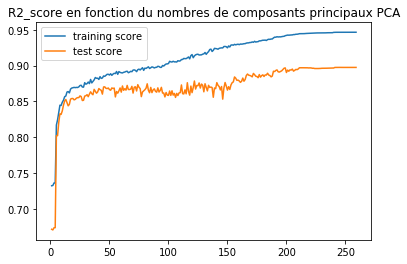

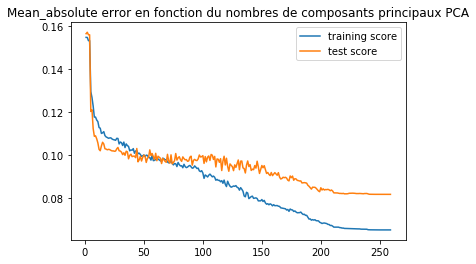

In [6]:
rtrain=[]
rtest=[]
mtrain=[]
mtest=[]
for i in range(1,260):
    X=train.iloc[:,:-1]
    y=train.iloc[:,-1]

    X_normalized = StandardScaler().fit_transform(X) 
    
    X_pca=PCA(i).fit_transform(X_normalized)
    
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=777)

    np.random.seed(5)
    Model = Ridge(alpha=100,max_iter=10000)
    Model = Model.fit(X_train, y_train)

    rtrain.append(Model.score(X_train,y_train))
    rtest.append(Model.score(X_test,y_test))
    
    ypred_train=Model.predict(X_train).reshape(-1,1)
    ypred_test=Model.predict(X_test).reshape(-1,1)
    mtrain.append(mean_absolute_error(y_train.values.reshape(-1,1), ypred_train))
    mtest.append(mean_absolute_error(y_test.values.reshape(-1,1), ypred_test))
    
plt.figure()
plt.plot(list(range(1,260)),rtrain, label="training score")
plt.plot(list(range(1,260)),rtest, label="test score")
plt.title("R2_score en fonction du nombres de composants principaux PCA")
plt.legend()

plt.figure()
plt.plot(list(range(1,260)),mtrain, label="training score")
plt.plot(list(range(1,260)),mtest, label="test score")
plt.title("Mean_absolute error en fonction du nombres de composants principaux PCA")
plt.legend()

En conclusion, réduire le nombre de dimensions à 100 au lieu de 263 permet de viser un niveau d'erreur assez satisfaisant de +/-19K€.

## RESEAU DE NEURONES

In [1880]:
#Deep Learning
from sklearn.model_selection import train_test_split
y=train.iloc[:,-1]
X=train.iloc[:,:-1]
X_normalized = StandardScaler().fit_transform(X) 
X=PCA(259).fit_transform(X_normalized)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [1881]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras import regularizers

dim = X.shape[1]

model = Sequential()
model.add(Dense(100, activation="sigmoid", input_dim=dim,kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
#,kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.15))

#model.add(Dense(10, activation="sigmoid"))
#model.add(Dropout(0.15))
model.add(Dense(1, activation="linear"))
model.compile("sgd", "mean_absolute_error", metrics=["mae"])

In [1882]:
history=model.fit(np.array(X_train), np.array(y_train), batch_size=100, epochs=1000, validation_split=0.1, verbose=0)

In [1883]:
#model.summary()
#model.predict(np.array(X_test))

In [1884]:
ypred_te=np.expm1(model.predict(np.array(X_test)).reshape(-1))
y_test=np.expm1(y_test)
ypred_tr=np.expm1(model.predict(np.array(X_train)).reshape(-1))
y_train=np.expm1(y_train)

In [1885]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
r2_score(y_train,ypred_tr)

0.9428575814616927

In [1886]:
r2_score(y_test,ypred_te)

0.8981813344501574

In [1887]:
mean_absolute_error(y_train,ypred_tr)

12437.736469072152

In [1888]:
mean_absolute_error(y_test,ypred_te)

15277.628638698649

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


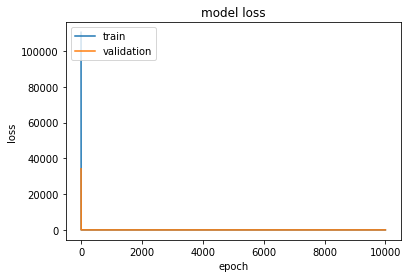

In [1865]:
print(history.history.keys())
# "Loss"
plt.plot(np.expm1(history.history['loss']))
plt.plot(np.expm1(history.history['val_loss']))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()